## Kaggle Project: House Prices - Advanced Regression Techniques

The packages imported:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from IPython.display import HTML, display
import tabulate
#metrics
from sklearn.metrics import mean_squared_error 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
#models 
from sklearn.linear_model import Ridge, LinearRegression, Lasso

Import data sets

In [3]:
main_df = pd.read_csv('train.csv')
train_df = pd.read_csv('train.csv') # 1- 1460
test_df = pd.read_csv('test.csv') # the rest
train_columns = list(train_df.columns.values.tolist())

In [4]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Put data together so that the changes are done to both test and train set

In [6]:
total_data = pd.concat((train_df, test_df)).reset_index(drop = True) 
total_data.drop("SalePrice", axis=1, inplace = True)
print(total_data.shape)

(2919, 80)


#### Preprocessing

Found code to drop columns with more that 5% null values

In [7]:
mincount_null = len(total_data.index)-int((len(total_data.index)*5)/100)
print("Drop null value amount: {}".format(mincount_null))

Drop null value amount: 2774


In [8]:
#the columns we are left with: 
total_data.dropna(axis=1,thresh=mincount_null).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [9]:
dropped = ['LotFrontage','Alley','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
           'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
total_data.drop(dropped,axis=1,inplace=True)
total_data.shape

(2919, 69)

In [10]:
#Categorical
#Values that are numbers, but represent years, quality, etc.
#Not ordinal values
MSSubClass
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MoSold
YrSold

NameError: name 'MSSubClass' is not defined

In [11]:
# Find features with ordianl scales (not numerical)
Street
LotShape
Utilities
LandSlope
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
KitchenQual
Foundation
CentralAir
PavedDrive
SaleCondition
SaleType

NameError: name 'Street' is not defined

In [12]:
non_ord_cols = ['MSZoning','LandContour','LotConfig','MSSubClass','OverallQual',
                'OverallCond','YearBuilt','LandSlope', 'RoofStyle','RoofMatl','Exterior1st',
                'MasVnrType','Heating','YearRemodAdd','MoSold','YrSold']

In [13]:
ordinal_cols = ['Street','LotShape','Utilities','LandSlope','ExterQual','ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'HeatingQC','KitchenQual','Foundation','CentralAir','Electrical',
               'PavedDrive','SaleCondition','SaleType']

In [14]:
# Found functions that will assign categorical variables a number 

# for ordianl
for feature in ordinal_cols:
    total_data[feature] = LabelEncoder().fit_transform(total_data[feature]) #return encoded labels
total_data.shape

(2919, 69)

In [15]:
for feature in non_ord_cols:
    one_hot = pd.get_dummies(total_data[feature],prefix=feature)
    total_data = pd.merge(left=total_data,right=one_hot,left_index=True,right_index=True)
total_data.shape

(2919, 356)

In [16]:
total_data.drop(non_ord_cols,axis=1,inplace=True)
total_data.head()

,Id,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1,8450,1,3,0,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,0,0,0,0,1,0,0
1,2,9600,1,3,0,Veenker,Feedr,Norm,1Fam,1Story,...,0,0,0,0,0,0,1,0,0,0
2,3,11250,1,0,0,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,0,0,0,0,1,0,0
3,4,9550,1,0,0,Crawfor,Norm,Norm,1Fam,2Story,...,0,0,0,0,0,1,0,0,0,0
4,5,14260,1,0,0,NoRidge,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,1,0,0


In [17]:
redundant_features = ['Neighborhood','Condition1','Condition2','BldgType',
                      'HouseStyle','Exterior2nd','ExterQual','Functional']
total_data.drop(redundant_features, axis=1, inplace=True)

In [18]:
# found function to tell us how much info we are missing
percent_missing = total_data.isnull().sum() * 100 / len(total_data)
missing_df = pd.DataFrame({'column_name': total_data.columns,
                                 'percent_missing': percent_missing})

missing_df.sort_values('percent_missing', ascending = False, inplace=True)

#show first 10
missing_df[:10]

,column_name,percent_missing
MasVnrArea,MasVnrArea,0.787941
BsmtFullBath,BsmtFullBath,0.068517
BsmtHalfBath,BsmtHalfBath,0.068517
BsmtUnfSF,BsmtUnfSF,0.034258
GarageCars,GarageCars,0.034258
GarageArea,GarageArea,0.034258
BsmtFinSF1,BsmtFinSF1,0.034258
TotalBsmtSF,TotalBsmtSF,0.034258
BsmtFinSF2,BsmtFinSF2,0.034258
RoofMatl_WdShngl,RoofMatl_WdShngl,0.000000


In [19]:
total_data = total_data.fillna(0)

In [20]:
#turn strings into int
total_data['MasVnrArea'] = total_data['MasVnrArea'].astype(int)
total_data['BsmtFinSF1'] = total_data['BsmtFinSF1'].astype(int)
total_data['BsmtFinSF2'] = total_data['BsmtFinSF2'].astype(int)
total_data['BsmtUnfSF'] = total_data['BsmtUnfSF'].astype(int)
total_data['TotalBsmtSF'] = total_data['TotalBsmtSF'].astype(int)
total_data['BsmtFullBath'] = total_data['BsmtFullBath'].astype(int)
total_data['BsmtHalfBath'] = total_data['BsmtHalfBath'].astype(int)
total_data['GarageCars'] = total_data['GarageCars'].astype(int)
total_data['GarageArea'] = total_data['GarageArea'].astype(int)

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 332 entries, Id to YrSold_2010
dtypes: int64(45), uint8(287)
memory usage: 1.8 MB


#### 3 Algorithms + PCA graph

In [21]:
total_data.drop(['Id'],axis = 1, inplace = True)

In [22]:
X_train = total_data[:1460]
X_test = total_data[1460:]
for_train = total_data[1460:]
y = pd.DataFrame(data = train_df['SalePrice'])

In [23]:
X_train.shape, X_test.shape

((1460, 331), (1459, 331))

In [24]:
# Making the graph
X = StandardScaler().fit_transform(X_train) #tranform data to have mean = 0 and sd = 1

pca_X = PCA(n_components = 331) #number of components
X = pca_X.fit_transform(X)

In [25]:
#variance of each component
explained_var = pca_X.explained_variance_ratio_

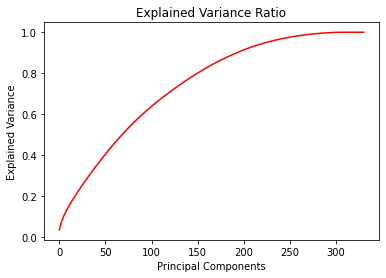

In [28]:
plt.figure()
plt.plot(np.cumsum(pca_X.explained_variance_ratio_),color = 'red')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()
## So, we can use around 150 - 200 features and we will get a good variance.

In [27]:
#split data 
x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape,

((730, 331), (730, 331), (730, 1), (730, 1))

In [29]:
# Linear Regression 

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
lr = reg.score(x_test, y_test)
reg.score(x_test, y_test)

-1251830206.0487263

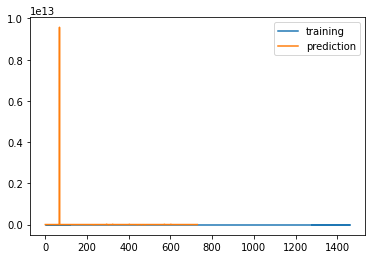

In [34]:
plt.plot(y_train, label='training')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

In [30]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso_coef = lasso.fit(x_train,y_train).coef_
y_pred_lss = lasso.predict(x_test)
lassoscore = lasso.score(x_test,y_test)
lasso.score(x_test,y_test)

/home/kenyag77/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+10, tolerance: 4.434e+08
  model = cd_fast.enet_coordinate_descent(
/home/kenyag77/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+10, tolerance: 4.434e+08
  model = cd_fast.enet_coordinate_descent(


0.8077661905828253

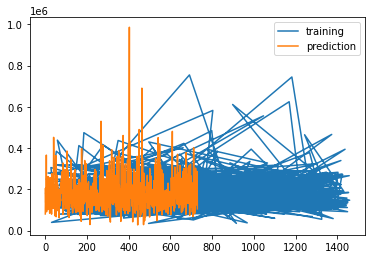

In [36]:
plt.plot(y_train, label='training')
plt.plot(y_pred_lss, label='prediction')
plt.legend()
plt.show()

In [31]:
## Ridge Regression 
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)    
y_pred_ridge = ridge.predict(x_test) #the answers
ypr = ridge.predict(x_train) 
rs = ridge.score(x_test, y_test)
ridge.score(x_test, y_test)

0.8104594805769431

Text(0, 0.5, 'Prediction')

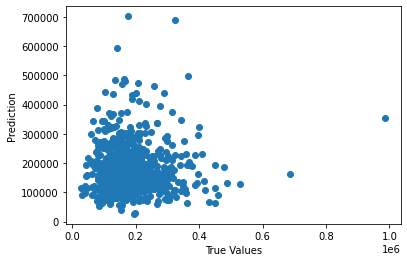

In [39]:
plt.scatter(y_pred_ridge, ypr) 
plt.xlabel('True Values') 
plt.ylabel('Prediction')
# Hmm, it seems like I have to make my data more linear next time. 

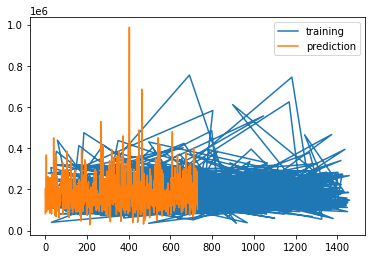

In [40]:
plt.plot(y_train, label='training')
plt.plot(y_pred_ridge, label='prediction')
plt.legend()
plt.show()

In [ ]:
table = [['LinearRegression',rmse_log,rmse_log2],
        ['RidgeRegression',rmse_rid,rmse_rid2],
        ['LassoRegression',rmse_lss,rmse_lss2]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["RMSE ","RMSE Log Error"])))

Finding RMSE 

In [42]:
rmse_log = mean_squared_error(y_test, y_pred, squared= False)
rmse_rid = mean_squared_error(y_test, y_pred_ridge, squared = False)
rmse_lss = mean_squared_error(y_test, y_pred_lss, squared = False)

rmse_log2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
rmse_rid2 = np.sqrt(mean_squared_error(y_test, y_pred_ridge, squared=False))
rmse_lss2 = np.sqrt(mean_squared_error(y_test, y_pred_lss, squared=False))

In [33]:
table = [['LinearRegression', lr],
        ['RidgeRegression', lassoscore],
        ['LassoRegression',rs]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=['Scores'])))

,Scores
LinearRegression,-1.25183e+09
RidgeRegression,0.807766
LassoRegression,0.810459


Submit

In [46]:
y_predr = reg.predict(X_test)

In [47]:
y_predr.shape

(1459, 1)

In [48]:
Pred = pd.DataFrame(y_predr)
Pred.columns = ['SalePrice']

In [49]:
ids = pd.DataFrame(test_df["Id"])

In [52]:
#put both the ids and predictions together
my_submission  = pd.concat([ids, Pred],axis = 1)
my_submission[:10]

,Id,SalePrice
0,1461,118876.330917
1,1462,127662.330917
2,1463,191586.330917
3,1464,189502.330917
4,1465,198641.330917
5,1466,137811.330917
6,1467,169590.330917
7,1468,158744.330917
8,1469,181711.330917
9,1470,114784.330917


In [53]:
my_submission.to_csv('houseregsubmit.csv', index=False)

In [59]:
table = [[ 2.47]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers = ['Score'])))

Score
2.47
